In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data_path='/kaggle/input/autompg-dataset/auto-mpg.csv'

data=pd.read_csv(data_path)

data['horsepower'] = data['horsepower'].replace('?', np.nan)
data = data.dropna()

In [2]:

feature_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                 'acceleration', 'model year', 'origin']

X = data[feature_names]
print(X)

Y=data.mpg

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70  

In [3]:

fuel=DecisionTreeRegressor(random_state=1)

fuel.fit(X,Y)



DecisionTreeRegressor(random_state=1)

In [4]:
prediction=fuel.predict(X)
print(prediction)




[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

In [5]:
print('Features:')
print(X.head())
print('MPG predictions:')
print(fuel.predict(X.head()))


Features:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  
MPG predictions:
[18. 15. 18. 16. 17.]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
fuel = DecisionTreeRegressor(random_state=1)
fuel.fit(X_train, Y_train)
Y_pred = fuel.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(Y_test, Y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.16797468354430342
R-squared: 0.9975769017552502


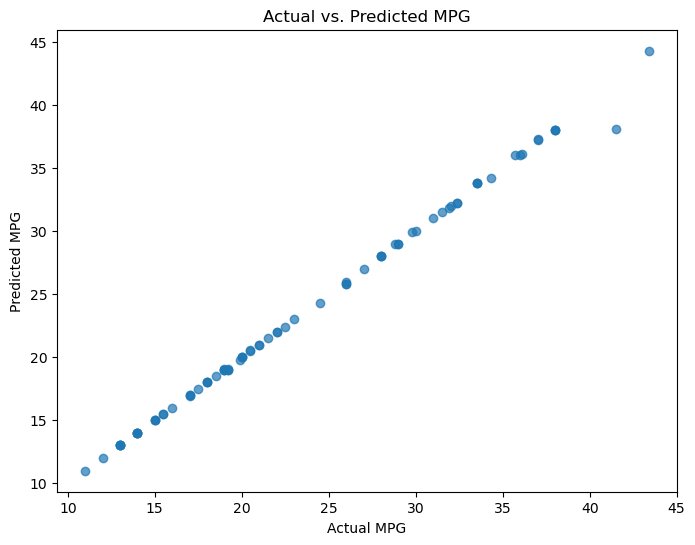

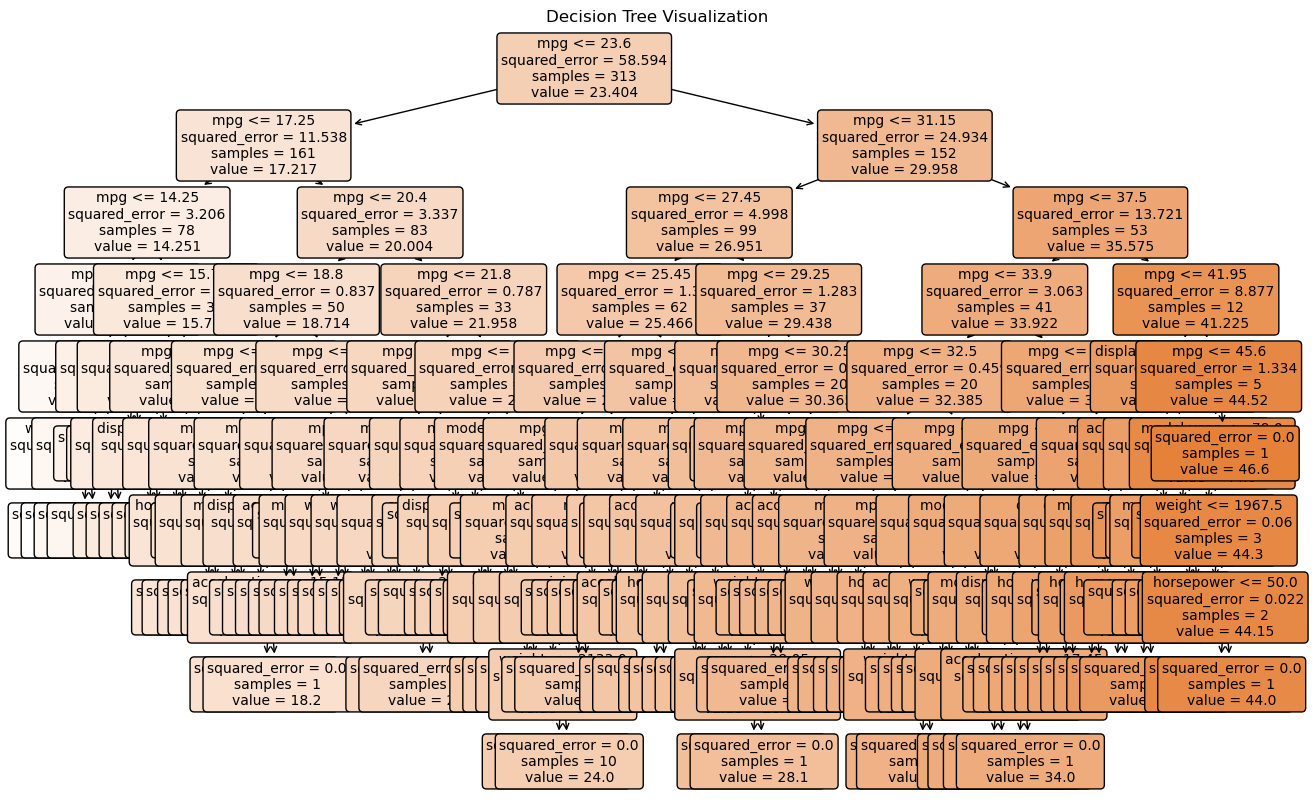

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.show()

# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(fuel, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()
